In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.cross_validation import train_test_split

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AR
# the "order" term when you construct the ARMA() takes a (p, q) tuple/list
# p is the AR order, q is the MA order.
# Setting p to zero gives you an MA model
# Setting q to zero gives you an AR model
# Kiefer doesn't know what happens if you put both to zero...why both using this at all if so?
from statsmodels.tsa.arima_model import ARMA
# arma_model = ARMA(y, (1, 1), exog = X)
# arma_results = arma_model.fit()
# print arma_results.summary()

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
stores = pd.read_csv('./stores.csv')

In [3]:
train= pd.read_csv('./train.csv')

In [4]:
features = pd.read_csv('./features.csv')

In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
print train.shape
train.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
print features.shape
features.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
features_store1 = features[features.Store == 1]
train_store1 = train[train.Store == 1]

In [9]:
train_store1.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
10239,1,99,2012-08-31,20.06,False
10240,1,99,2012-09-07,0.05,True
10241,1,99,2012-09-14,0.03,False
10242,1,99,2012-10-05,635.00,False
10243,1,99,2012-10-12,80.00,False


In [10]:
store1 = pd.merge(features_store1, train_store1)

In [11]:
store1.Date = pd.to_datetime(store1.Date)

In [12]:
store1 = store1.set_index('Date')

In [13]:
store1.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
Date,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


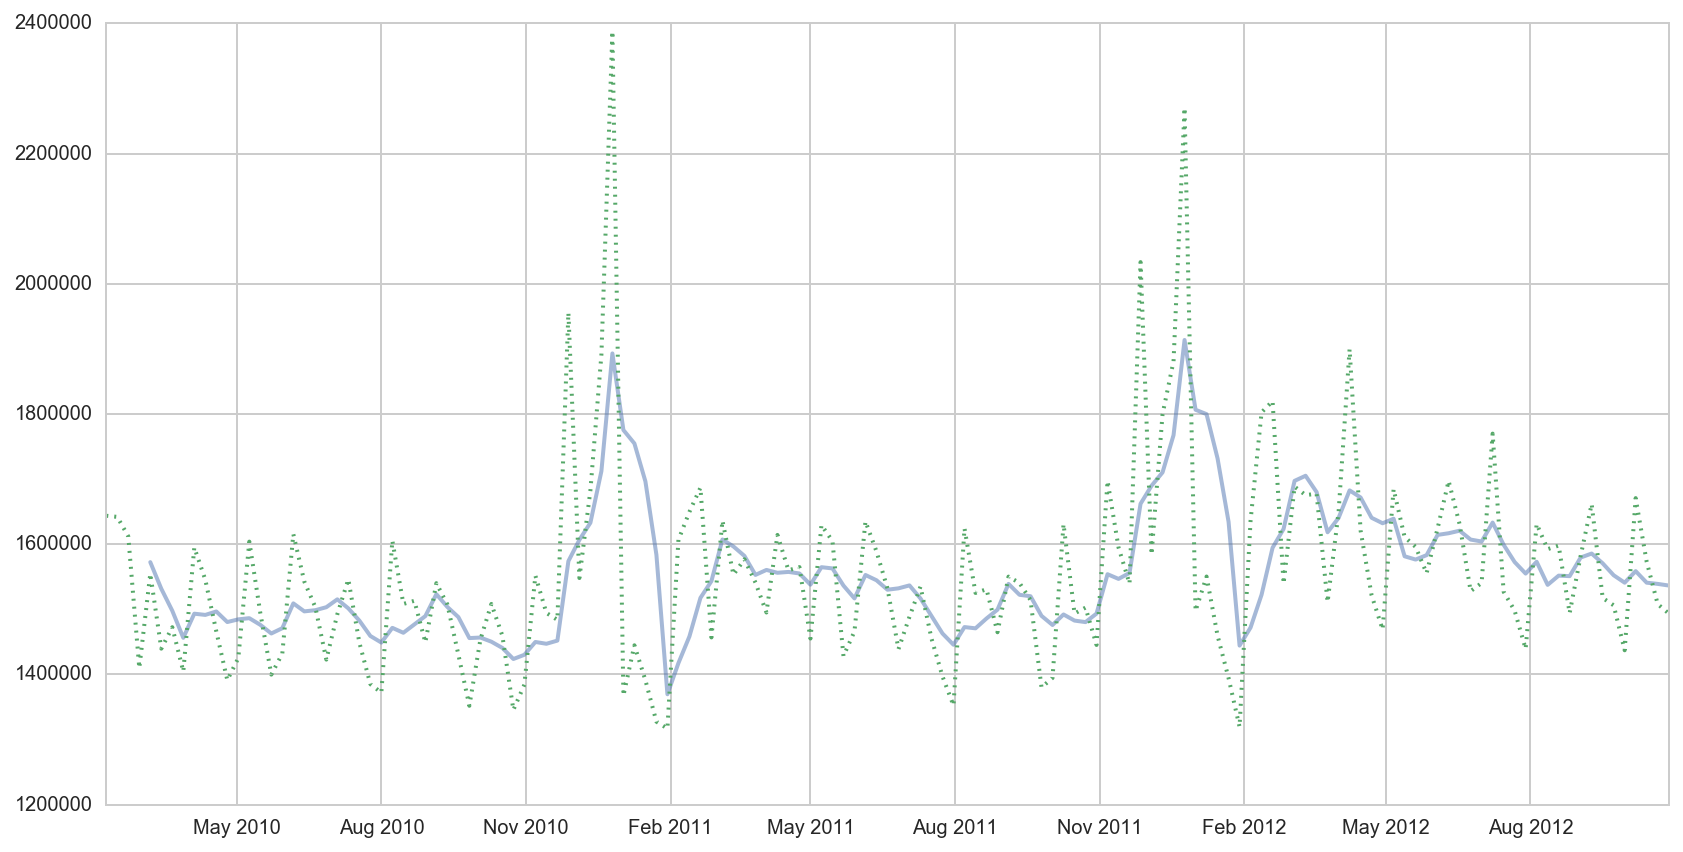

In [31]:
plt.figure(figsize=(14,7))

plt.plot(store1['Weekly_Sales'].resample('W').sum().rolling(window=5).mean(), alpha = 0.5, lw = 2)
plt.plot(store1['Weekly_Sales'].resample('W').sum(), alpha = 1, lw = 2, ls = 'dotted')

In [36]:
s1_weekly_sales = store1['Weekly_Sales'].resample('W').sum()

In [37]:
range = [1, 2, 52]

s1_autocorrelations = [s1_weekly_sales.autocorr(lag=l) for l in range]

In [38]:
s1_autocorrelations

[0.30215827941131268, 0.12741313055390102, 0.8953760294777009]

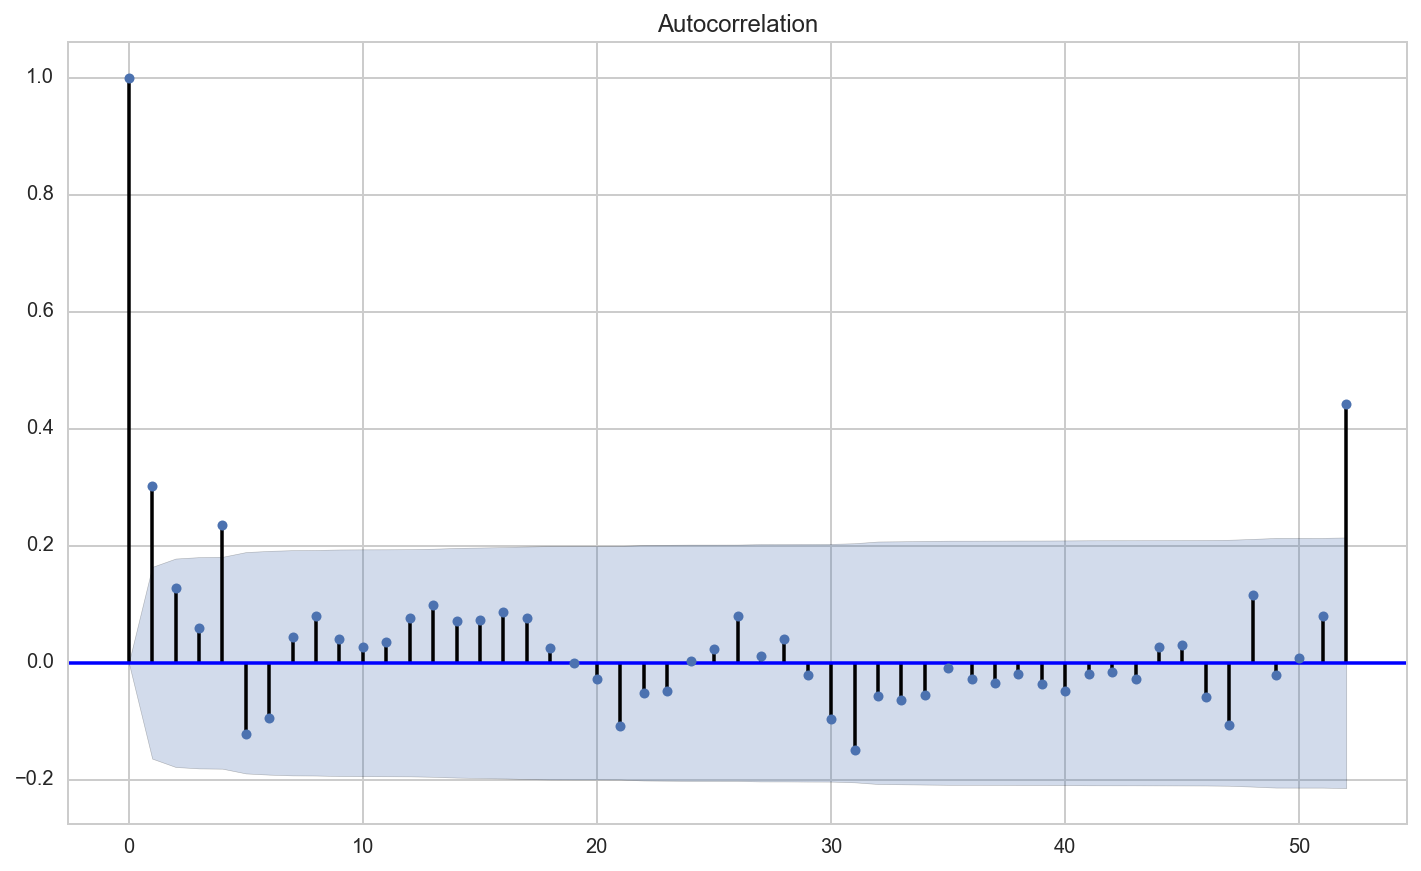

In [39]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
plot_acf(s1_weekly_sales, lags = 52, ax=ax)
plt.show()

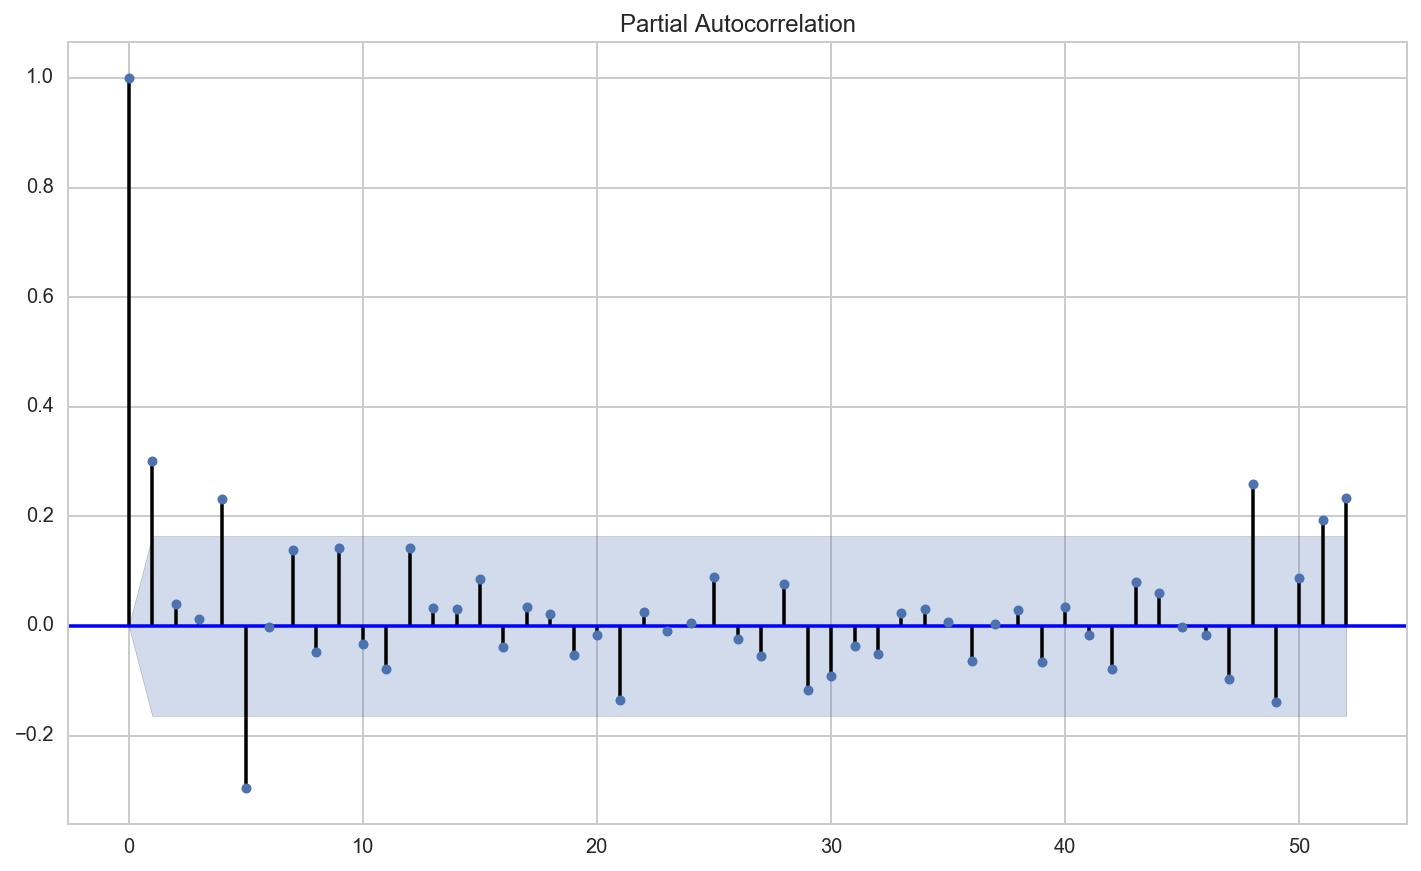

In [40]:
fig = plt.figure(figsize=(12,7))
ax = fig.gca()
plot_pacf(s1_weekly_sales, lags = 52, ax=ax)
plt.show()

In [ ]:
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.25)